## [진행상황]

## 1. 연도별 데이터 concat

## 2. y변수추가(권혁님 코드 추가)

## 3. Feature Selecting

## 4. null값 확인(홍익선님 코드 추가)

## 5. 변수들 간의 correlation 확인

## 6. skewness

## 7. modeling test

### 기존데이터 불러오기(이건 무시..)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
# 경기 데이터
game_2016 = pd.read_csv('data\game_2016.csv', encoding='CP949')
game_2017 = pd.read_csv('data\game_2017.csv', encoding='CP949')
game_2018 = pd.read_csv('data\game_2018.csv', encoding='CP949')
game_2019 = pd.read_csv('data\game_2019.csv', encoding='CP949')
game_2020 = pd.read_csv('data\game_2020.csv', encoding='CP949')

In [3]:
# 선수 데이터 
players_2016 = pd.read_csv('data\players_2016.csv', encoding='CP949')
players_2017 = pd.read_csv('data\players_2017.csv', encoding='CP949')
players_2018 = pd.read_csv('data\players_2018.csv', encoding='CP949')
players_2019 = pd.read_csv('data\players_2019.csv', encoding='CP949')
players_2020 = pd.read_csv('data\players_2020.csv', encoding='CP949')

In [4]:
# 개인 투수 
private_pitcher_2016 = pd.read_csv('data\private_pitcher_2016.csv',encoding='CP949')
private_pitcher_2017 = pd.read_csv('data\private_pitcher_2017.csv',encoding='CP949')
private_pitcher_2018 = pd.read_csv('data\private_pitcher_2018.csv',encoding='CP949')
private_pitcher_2019 = pd.read_csv('data\private_pitcher_2019.csv',encoding='CP949')
private_pitcher_2020 = pd.read_csv('data\private_pitcher_2020.csv',encoding='CP949')

In [5]:
# 개인 타자 
private_batter_2016 = pd.read_csv('data\private_batter_2016.csv', encoding='CP949')
private_batter_2017 = pd.read_csv('data\private_batter_2017.csv', encoding='CP949')
private_batter_2018 = pd.read_csv('data\private_batter_2018.csv', encoding='CP949')
private_batter_2019 = pd.read_csv('data\private_batter_2019.csv', encoding='CP949')
private_batter_2020 = pd.read_csv('data\private_batter_2020.csv', encoding='CP949')

In [6]:
# 팀 투수
team_pitcher_2016 = pd.read_csv('data\\team_pitcher_2016.csv',encoding='CP949')
team_pitcher_2017 = pd.read_csv('data\\team_pitcher_2017.csv',encoding='CP949')
team_pitcher_2018 = pd.read_csv('data\\team_pitcher_2018.csv',encoding='CP949')
team_pitcher_2019 = pd.read_csv('data\\team_pitcher_2019.csv',encoding='CP949')
team_pitcher_2020 = pd.read_csv('data\\team_pitcher_2020.csv',encoding='CP949')

In [7]:
# 팀 타자 
team_batter_2016 = pd.read_csv('data\\team_batter_2016.csv', encoding='CP949')
team_batter_2017 = pd.read_csv('data\\team_batter_2017.csv', encoding='CP949')
team_batter_2018 = pd.read_csv('data\\team_batter_2018.csv', encoding='CP949')
team_batter_2019 = pd.read_csv('data\\team_batter_2019.csv', encoding='CP949')
team_batter_2020 = pd.read_csv('data\\team_batter_2020.csv', encoding='CP949')

In [8]:
# 팀
team = pd.read_csv('data\\team_2016.csv', encoding='CP949')

# 1. 연도별 데이터 하나의 데이터로 합치기 
- 등록선수 데이터 버리기
- 팀데이터는 연도별로 동일

In [9]:
game = pd.concat([game_2016,game_2017,game_2018,game_2019,game_2020])
players = pd.concat([players_2016,players_2017,players_2018,players_2019,players_2020])
private_pitcher = pd.concat([private_pitcher_2016,private_pitcher_2017,private_pitcher_2018,private_pitcher_2019,private_pitcher_2020])
private_batter = pd.concat([private_batter_2016,private_batter_2017,private_batter_2018,private_batter_2019,private_batter_2020])
team_pitcher = pd.concat([team_pitcher_2016,team_pitcher_2017,team_pitcher_2018,team_pitcher_2019,team_pitcher_2020])
team_batter = pd.concat([team_batter_2016,team_batter_2017,team_batter_2018,team_batter_2019,team_batter_2020])

In [10]:
game.to_csv('data\game.csv',index=False)
players.to_csv('data\players.csv',index=False)
private_pitcher.to_csv('data\private_pitcher.csv',index=False)
private_batter.to_csv('data\private_batter.csv',index=False)
team_pitcher.to_csv('data\\team_pitcher.csv',index=False)
team_batter.to_csv('data\\team_batter.csv',index=False)
team.to_csv('data\\team.csv',index=False)

# 2. 새로운 변수 추가 : 타율 출루율 방어율 도루관련변수

- 분모가 0이 나온 na값은 0으로 채워줌
- 권혁님 보내주신 x변수들 추가

### 1) 타율(AVG):  HIT / AB
- 안타(홈런)/타수

In [11]:
private_batter['AVG'] = private_batter['HIT']/private_batter['AB']
private_batter['AVG'] = private_batter['AVG'].fillna(0)

In [12]:
team_batter['AVG'] = team_batter['HIT']/team_batter['AB']
team_batter['AVG'] = team_batter['AVG'].fillna(0)

### 2) 출루율(OBP) : HIT +  BB + IB + HP / PA
- 안타(홈런),4구,고의4구,사구 / 타석수

In [13]:
private_batter['OBP'] = (private_batter['HIT']+private_batter['BB']+private_batter['IB']+private_batter['HP'])/private_batter['PA']
private_batter['OBP'] = private_batter['OBP'].fillna(0)

In [14]:
team_batter['OBP'] = (team_batter['HIT']+team_batter['BB']+team_batter['IB']+team_batter['HP'])/team_batter['PA']
team_batter['OBP'] = team_batter['OBP'].replace
team_batter['OBP'] = team_batter['OBP'].fillna(0)

### 3) 방어율(ERA): ER*9 / (INN2/3)

- (총 자책점 * 9 ) / 총 던진 이닝수 

In [15]:
private_pitcher['ERA'] = private_pitcher['ER'] / (private_pitcher['INN2']/3)
private_pitcher['ERA'] = private_pitcher['ERA'].fillna(0)

In [16]:
team_pitcher['ERA'] = team_pitcher['ER'] / (team_pitcher['INN2']/3)
team_pitcher['ERA'] = team_pitcher['ERA'].fillna(0)

### 4) 도루 시도 횟수(SB_trial):SB+CS

In [17]:
private_batter['SB_trial'] =  private_batter['SB'] + private_batter['CS']

In [18]:
team_batter['SB_trial'] =  team_batter['SB'] + team_batter['CS']

### 5) 도루 성공율(SB_SR) : SB / (SB+CS)

In [19]:
private_pitcher['SB_SR'] = private_pitcher['SB']/(private_pitcher['SB'] + private_pitcher['CS'])
private_pitcher['SB_SR'] = private_pitcher['SB_SR'].fillna(0)

In [20]:
team_pitcher['SB_SR'] = team_pitcher['SB']/(team_pitcher['SB'] + team_pitcher['CS'])
team_pitcher['SB_SR'] = team_pitcher['SB_SR'].fillna(0)

### 6) PA-AB

In [21]:
private_pitcher['PA-AB'] = private_pitcher['PA']-private_pitcher['AB']
private_batter['PA-AB'] = private_batter['PA']-private_batter['AB']

In [22]:
team_pitcher['PA-AB'] = team_pitcher['PA']-team_pitcher['AB']
team_batter['PA-AB'] = team_batter['PA']-team_batter['AB']

### 7) SH+SF

In [23]:
private_batter['SH+SF'] = private_batter['SH']+private_batter['SF']

In [24]:
team_batter['SH+SF'] = team_batter['SH']+team_batter['SF']

### 8) BABIP
- 인플레이 타구 (방망이에 공이 맞았을 때)의 안타 비율 (타자, 투수 모두에게 사용 가능한 지표)

In [25]:
private_pitcher['BABIP'] = (private_pitcher['HIT'] - private_pitcher['HR']) / (private_pitcher['AB'] - private_pitcher['KK'] - private_pitcher['HR'] + private_pitcher['SF'])
private_pitcher['BABIP'] = private_pitcher['BABIP'].fillna(0)

In [26]:
team_pitcher['BABIP'] = (team_pitcher['HIT'] - team_pitcher['HR']) / (team_pitcher['AB'] - team_pitcher['KK'] - team_pitcher['HR'] + team_pitcher['SF'])
team_pitcher['BABIP'] = team_pitcher['BABIP'].fillna(0)

In [27]:
private_batter['BABIP'] = (private_batter['HIT'] - private_batter['HR']) / (private_batter['AB'] - private_batter['KK'] - private_batter['HR'] + private_batter['SF'])
private_batter['BABIP'] = private_batter['BABIP'].fillna(0)

In [28]:
team_batter['BABIP'] = (team_batter['HIT'] - team_batter['HR']) / (team_batter['AB'] - team_batter['KK'] - team_batter['HR'] + team_batter['SF'])
team_batter['BABIP'] = team_batter['BABIP'].fillna(0)

### 9) SLG

In [29]:
private_pitcher['SLG'] = private_pitcher['H2'] + private_pitcher['H3'] +private_pitcher['HR']

In [30]:
team_pitcher['SLG'] = team_pitcher['H2'] + team_pitcher['H3'] + team_pitcher['HR']

### 10) KK9
- 9이닝 당 삼진개수 , 던진 이닝과 관계 없이 삼진 능력 파악

In [31]:
private_pitcher['KK9'] = (private_pitcher['KK'] / private_pitcher['INN2'])*27
private_pitcher['KK9'] = private_pitcher['KK9'].fillna(0)

In [32]:
team_pitcher['KK9'] = (team_pitcher['KK'] / team_pitcher['INN2'])*27
team_pitcher['KK9'] = team_pitcher['KK9'].fillna(0)

### 11) BB9
- 9이닝 당 볼넷 개수 , 던진 이닝과 관계 없이 제구력 파악

In [33]:
private_pitcher['BB9'] = ((private_pitcher['BB'] + private_pitcher['HP'])/ private_pitcher['INN2'])*27
private_pitcher['BB9'] = private_pitcher['BB9'].fillna(0)

In [34]:
team_pitcher['BB9'] = ((team_pitcher['BB'] + team_pitcher['HP'])/ team_pitcher['INN2'])*27
team_pitcher['BB9'] = team_pitcher['BB9'].fillna(0)

## 12) H1(단타 허용)

In [35]:
private_pitcher['H1'] = private_pitcher['HIT'] - private_pitcher['SLG']

In [36]:
team_pitcher['H1'] = team_pitcher['HIT'] - team_pitcher['SLG']

In [37]:
private_pitcher = private_pitcher.replace(np.inf,0)
private_batter = private_batter.replace(np.inf,0)
team_pitcher = team_pitcher.replace(np.inf,0)
team_batter = team_batter.replace(np.inf,0)

# 3. Feature Selecting 
- 개인 데이터, 팀 데이터 고려해서 각각 모델링을 하고 성능이 더 좋은 것을 사용하기로 함

### game

In [38]:
game = game.drop(['G_ID','HEADER_NO','GWEEK'],axis=1)

### players

In [39]:
players = players.drop(['NAME','POSITION','MONEY'],axis=1)

### 개인 투수

SLG, BABIP, KK9, BB9, H1

In [40]:
private_pitcher = private_pitcher[['GDAY_DS','T_ID','P_ID','TB_SC','INN2','BF','PA-AB','AB','HIT','H1','H2','H3','HR','SB_SR','KK','WP','ER','ERA','SLG','BABIP','KK9','BB9']]
private_pitcher['GDAY_DS'] = pd.to_datetime(private_pitcher['GDAY_DS'],format='%Y%m%d')

In [41]:
private_pitcher.head()

,GDAY_DS,T_ID,P_ID,TB_SC,INN2,BF,PA-AB,AB,HIT,H1,...,HR,SB_SR,KK,WP,ER,ERA,SLG,BABIP,KK9,BB9
0,2016-04-01,LG,60146,B,6,29,1,7,1,1,...,0,0.0,3,0,0,0.000000,0,0.250000,13.50,4.50
1,2016-04-01,LG,61891,B,5,33,2,6,2,2,...,0,0.0,1,0,0,0.000000,0,0.400000,5.40,5.40
2,2016-04-01,LG,62146,B,1,7,0,2,1,1,...,0,0.0,0,0,0,0.000000,0,0.500000,0.00,0.00
3,2016-04-01,LG,62698,B,18,94,3,25,9,7,...,0,0.0,4,0,4,0.666667,2,0.428571,6.00,1.50
4,2016-04-01,HH,65764,T,4,27,2,4,1,0,...,0,0.0,1,0,1,0.750000,1,0.333333,6.75,6.75


### 개인 타자

In [42]:
private_batter = private_batter[['GDAY_DS','T_ID','P_ID','TB_SC','PA-AB','AB','RUN','RBI','HIT','SH+SF','KK','AVG','SB_trial','BABIP']]
private_batter['GDAY_DS'] = pd.to_datetime(private_batter['GDAY_DS'],format='%Y%m%d')

In [43]:
private_batter.head()

,GDAY_DS,T_ID,P_ID,TB_SC,PA-AB,AB,RUN,RBI,HIT,SH+SF,KK,AVG,SB_trial,BABIP
0,2016-04-01,HH,60404,T,0,1,0,0,1,0,0,1.00,0,1.0
1,2016-04-01,LG,61102,B,0,3,0,0,0,0,2,0.00,0,0.0
2,2016-04-01,LG,61186,B,0,4,2,2,3,0,1,0.75,1,1.0
3,2016-04-01,LG,62164,B,1,0,0,0,0,0,0,0.00,0,0.0
4,2016-04-01,HH,62700,T,0,2,1,0,1,0,0,0.50,0,0.5


### 팀 데이터

In [44]:
team_pitcher = team_pitcher[['GDAY_DS','T_ID','TB_SC','INN2','BF','PA-AB','AB','HIT','H1','H2','H3','HR','SB_SR','KK','WP','ER','ERA','BABIP','KK9','BB9']]
team_batter = team_batter[['GDAY_DS','T_ID','TB_SC','PA-AB','AB','RUN','HIT','RBI','SH+SF','KK','AVG','SB_trial','BABIP']]

### 피처셀렉팅, 새로운 변수추가된 데이터 /data에 저장

In [45]:
game.to_csv('data\game.csv',index=False)
players.to_csv('data\players.csv',index=False)
private_pitcher.to_csv('data\private_pitcher.csv',index=False)
private_batter.to_csv('data\private_batter.csv',index=False)
team_pitcher.to_csv('data\\team_pitcher.csv',index=False)
team_batter.to_csv('data\\team_batter.csv',index=False)

# 4. Null값 확인
- null값은 없어 보인다

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
print(game.shape)
print(game.isna().sum())
print(np.sum(game=="?", axis=1).value_counts())

(3200, 4)
GDAY_DS      0
VISIT_KEY    0
HOME_KEY     0
STADIUM      0
dtype: int64
0    3200
dtype: int64


In [48]:
print(players.shape)
print(players.isna().sum())
print(np.sum(players=="?", axis=1).value_counts())

(3271, 4)
GYEAR     0
PCODE     0
T_ID      0
AGE_VA    0
dtype: int64
0    3271
dtype: int64


In [49]:
print(team.shape)
print(team.isna().sum())
print(np.sum(team=="?", axis=1).value_counts())

(10, 2)
T_ID    0
T_NM    0
dtype: int64
0    10
dtype: int64


In [50]:
print(private_batter.shape)
print(private_batter.isna().sum())
print(np.sum(private_batter=="?", axis=1).value_counts())

(81102, 14)
GDAY_DS     0
T_ID        0
P_ID        0
TB_SC       0
PA-AB       0
AB          0
RUN         0
RBI         0
HIT         0
SH+SF       0
KK          0
AVG         0
SB_trial    0
BABIP       0
dtype: int64
0    81102
dtype: int64


In [51]:
print(private_pitcher.shape)
print(private_pitcher.isna().sum())
print(np.sum(private_pitcher=="?", axis=1).value_counts())

(27804, 22)
GDAY_DS    0
T_ID       0
P_ID       0
TB_SC      0
INN2       0
BF         0
PA-AB      0
AB         0
HIT        0
H1         0
H2         0
H3         0
HR         0
SB_SR      0
KK         0
WP         0
ER         0
ERA        0
SLG        0
BABIP      0
KK9        0
BB9        0
dtype: int64
0    27804
dtype: int64


In [52]:
print(team_batter.shape)
print(team_batter.isna().sum())
print(np.sum(team_batter=="?", axis=1).value_counts())

(6400, 13)
GDAY_DS     0
T_ID        0
TB_SC       0
PA-AB       0
AB          0
RUN         0
HIT         0
RBI         0
SH+SF       0
KK          0
AVG         0
SB_trial    0
BABIP       0
dtype: int64
0    6400
dtype: int64


In [53]:
print(team_pitcher.shape)
print(team_pitcher.isna().sum())
print(np.sum(team_pitcher=="?", axis=1).value_counts())

(6400, 20)
GDAY_DS    0
T_ID       0
TB_SC      0
INN2       0
BF         0
PA-AB      0
AB         0
HIT        0
H1         0
H2         0
H3         0
HR         0
SB_SR      0
KK         0
WP         0
ER         0
ERA        0
BABIP      0
KK9        0
BB9        0
dtype: int64
0    6400
dtype: int64


# 5. X 변수 간 correlation 확인

- private_pitcher에서 높은 상관관계를 보이는 변수들이 있어 조정이 필요하다
- private_batter, team_pitcher, team_batter 데이터 x변수는 그대로 사용 가능할듯..

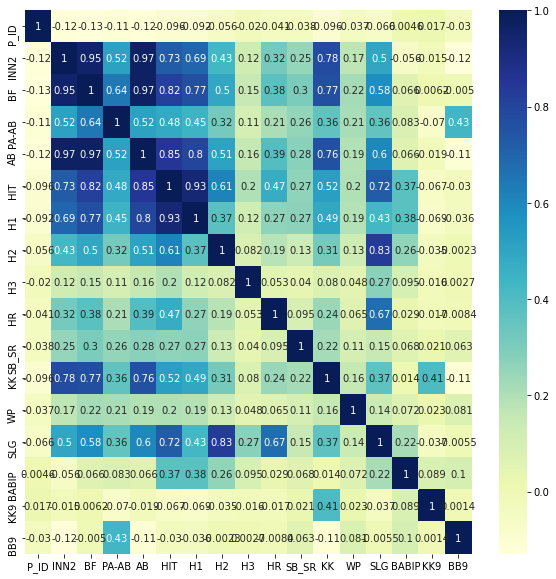

In [54]:
temp = private_pitcher.drop(['ER','ERA'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')

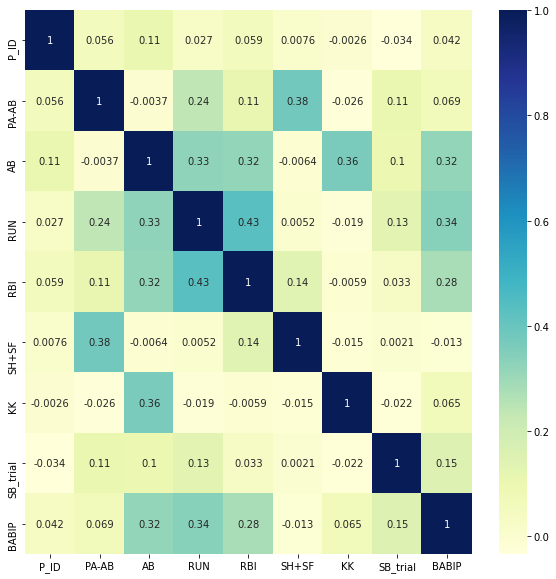

In [55]:
temp = private_batter.drop(['HIT','AVG'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')

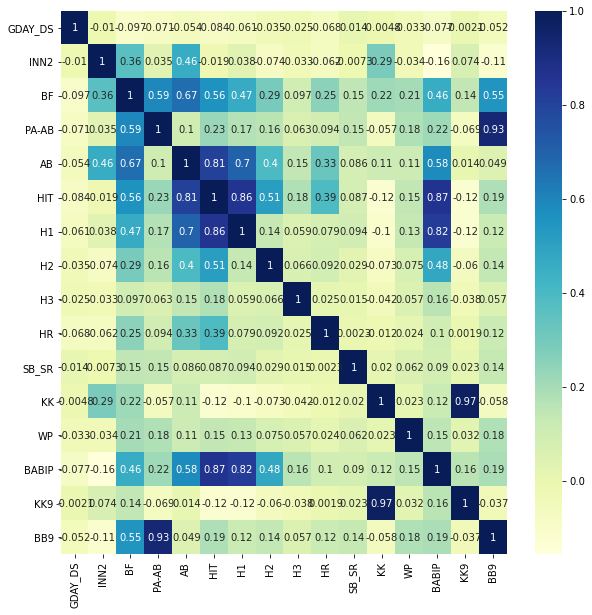

In [56]:
temp = team_pitcher.drop(['ER','ERA'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')

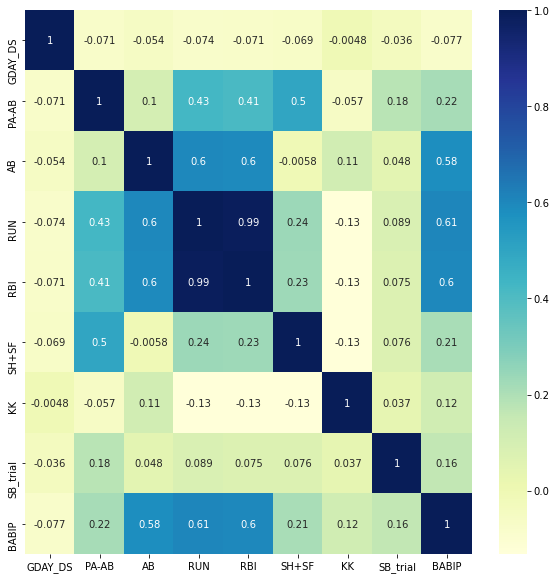

In [57]:
temp = team_batter.drop(['HIT','AVG'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')

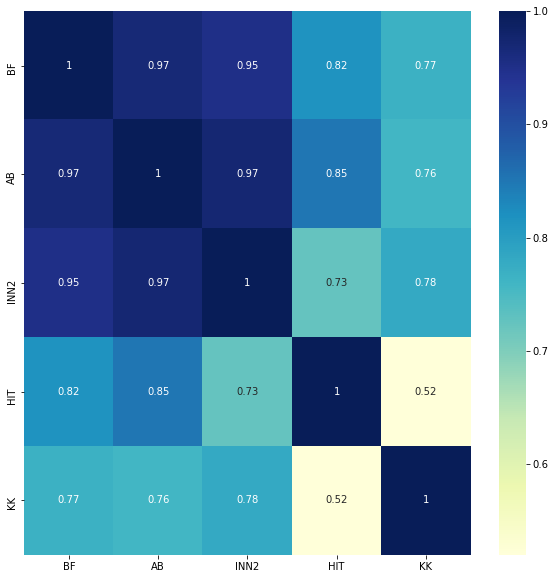

In [58]:
labels = ['BF','AB','INN2','HIT','KK']
temp = private_pitcher[['BF','AB','INN2','HIT','KK']]

figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')

1. 모델링 방향


- 과거의 x변수로 현재의 y값을 예측하는 알고리즘을 만들자
- 나중에 타율을 예측한다고 할 때 우리가 가지고 있는 문제는 미래의 x값도 모른다는 것! 이렇게 되면 예측해야 하는 것들이 많아진다.. 
- A선수의 9/10 경기에서의 타율을 예측한다고 할 때 X변수를 가장 최근 일주일 치 경기의 X변수들의 평균 혹은, 최근 경기일 수록 높은 가중치를 주는 방향으로 X값을 다시 설정하고 그 X값으로 Y값을 예측하는 방식
- 이 때 각 X값에 대한 각각의 변동성도 파생변수로 넣어주면 좋을 것 같다


2. 다중공산성 문제 


- 다중 회귀분석을 할 때 독립변수 간의 상관계수가 0.7 이상인 경우 포함되어서는 안된다. Batter correlation matrix에서는 다중공산성 문제가 발생하지 않아서 냅둬도 된다. team_pitcher 데이터의 경우 HIT AB에서 0.8의 높은 상관계수를 보이는데, AB에 HIT의 비중이 커서 나타나는 문제고 하나의 변수에서만 발생하는데 PCA나 변수제거하는 것은 무리가 있어보임. 해결해야하는 것은 Private_pitcher데이터 > PCA를 통해 해결해보자
- PCA는 데이터 간의 다중공산성이 높을 때 데이터를 가장 잘 설명해주면서 서로 독립적인 인공변수를 만들어준다. 우리가 사용하는 변수는 총 11개 이중에서 n_components 몇개의 변수로 설명할 것인지 지정해주는 것이 중요해 보임


3. Skewed data문제


- H2 H3 HR과 같은 변수들은 0과 5사이의 정수값을 가지는데, 이 분포를 로그변환을 취해서 정규분포화 하는 것이 의미가 없어보임.. 촘촘한 값들로 이루어진 분포도 아니고 정수 값을 가지고 있기 때문에.. 그리고 이 값들은 0의 값이 많아서 당연히 Skewed 형태를 띨 수밖에 없다. 
- 앞에서 말한 모델링 방법을 사용하면 일주일치의 값을 x값으로 사용할 것이기 때문에 데이터 값이 0인 경우가 줄어들어서 데이터의 불균형 문제도 자동으로 해결되지 않을까??
- log transformation을 할 때도 정규분포화가 되지 않기 때문에 건드리지 않아도 될 듯 하다


4. 파생변수


**BABIP**  
- (안타-홈런) / (타수-삼진-홈런+희생플라이)
- 타율 계산에 들어가는 모든 타구 + 희생플라이,, 순수한 실력 외에 운의 영향을 가늠할 수 있는 지표


1) 모든 투수는 일정한 수준의 BABIP를 유지한다.. 
2) 타자는 개인의 재능에 따라서 커리어 내내 비슷한 수준의 BABIP를 유지한다 


- 타자의 경우 일반적인 수준보다 높은 BABIP의 값을 가지면 성적하락을 의심해볼 수 있다

**FIP**
- (13 * 홈런 + 3 * 허용한 볼넷 수 – 2* 삼진) / (이닝) + 상수
- 수비 무관 평균 자책점. 투수가 전적으로 책임지는 대상으로 만든 것
- ERA와 FIP모두 얼마나 실점을 허용하는지 보여주는 지표이나, FIP는 실점 중에 투수의 책임이 큰 세가지만 이용하는 것. ERA는 이닝 대비 자책점 허용률, FIP는 자책점에 투수의 책임이 큰 홈런과 볼넷, 삼진은 얼마나 잡았는가의 답
- 연도별 변동성도 적고 예측력도 높은 편

# 6. skewness 

- pitcher

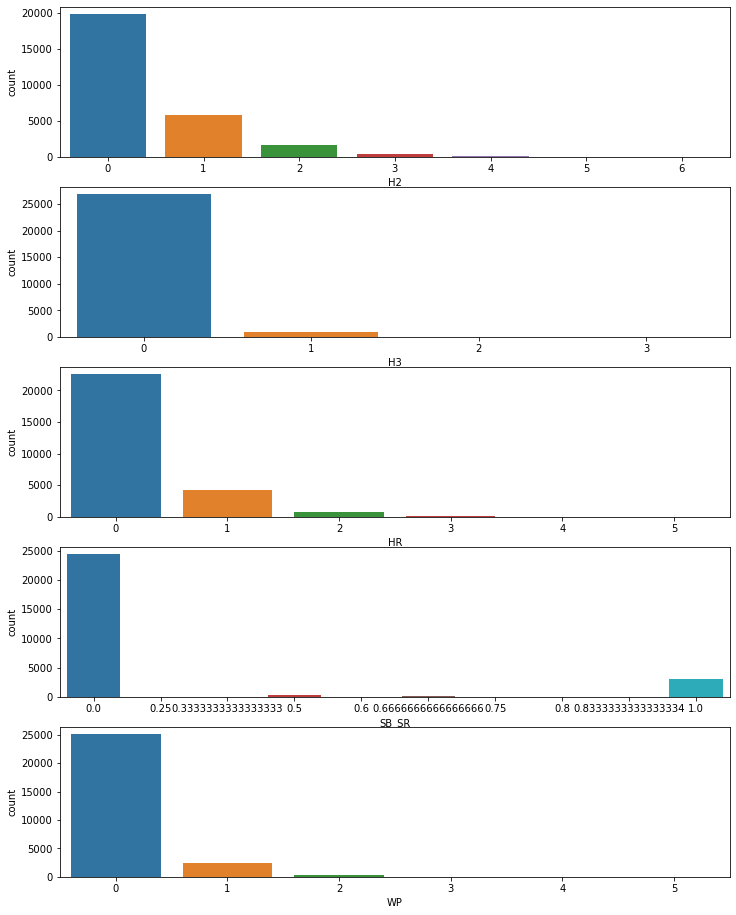

In [59]:
figure,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5,ncols=1)
figure.set_size_inches(12,16) 

sns.countplot(private_pitcher['H2'],ax=ax1)
sns.countplot(private_pitcher['H3'],ax=ax2)
sns.countplot(private_pitcher['HR'],ax=ax3)
sns.countplot(private_pitcher['SB_SR'],ax=ax4)
sns.countplot(private_pitcher['WP'],ax=ax5)

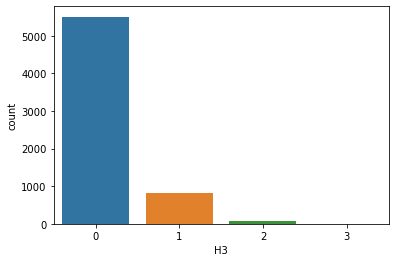

In [60]:
sns.countplot(team_pitcher['H3'])

- batter

In [61]:
print(private_batter['RBI'].unique())
print(private_batter['SH+SF'].unique())
print(private_batter['SB_trial'].unique())

[0 2 1 3 4 6 5 7 8]
[0 1 2 3]
[0 1 3 2 4]


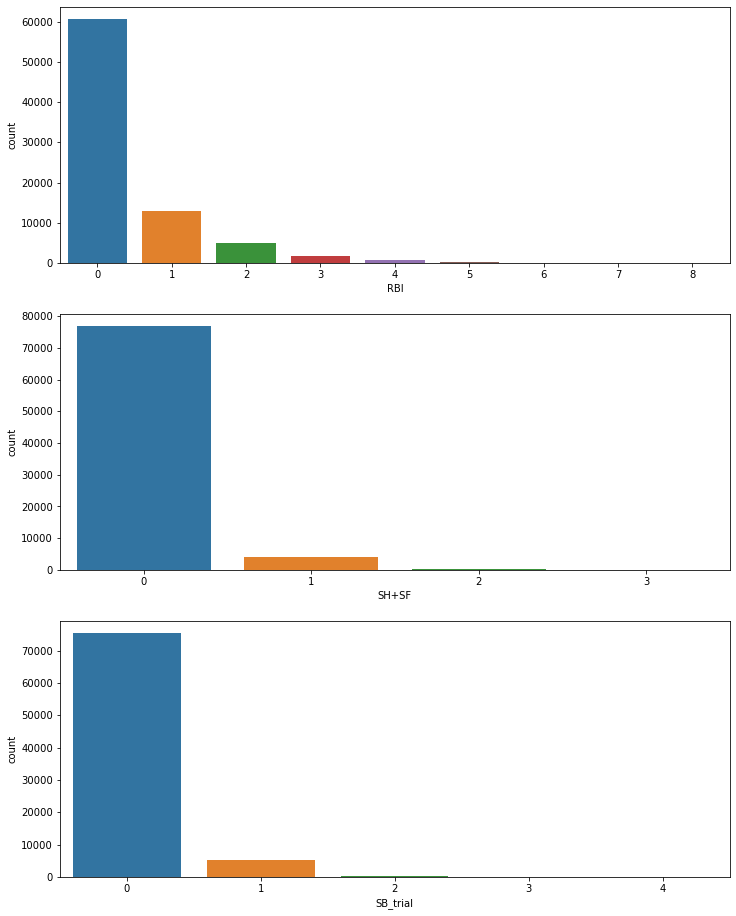

In [62]:
figure,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(12,16) 

sns.countplot(private_batter['RBI'],ax=ax1)
sns.countplot(private_batter['SH+SF'],ax=ax2)
sns.countplot(private_batter['SB_trial'],ax=ax3)

# 7. 모델링 테스트

In [63]:
private_pitcher['P_ID'].nunique()

506

- 506명의 pitcher존재

In [64]:
temp = private_pitcher[(private_pitcher['P_ID']==61891)&(private_pitcher['GDAY_DS'].dt.year<2020)]
temp.head()

,GDAY_DS,T_ID,P_ID,TB_SC,INN2,BF,PA-AB,AB,HIT,H1,...,HR,SB_SR,KK,WP,ER,ERA,SLG,BABIP,KK9,BB9
1,2016-04-01,LG,61891,B,5,33,2,6,2,2,...,0,0.0,1,0,0,0.00,0,0.400000,5.4,5.4
48,2016-04-02,LG,61891,B,3,9,1,4,2,1,...,0,0.0,1,0,1,1.00,1,0.666667,9.0,0.0
195,2016-04-07,LG,61891,T,4,28,2,5,1,0,...,0,0.0,2,1,1,0.75,1,0.333333,13.5,13.5
254,2016-04-08,LG,61891,T,1,15,1,2,1,1,...,0,0.0,1,0,0,0.00,0,1.000000,27.0,27.0
342,2016-04-10,LG,61891,T,1,2,0,1,0,0,...,0,0.0,0,0,0,0.00,0,0.000000,0.0,0.0


- 선수ID 60146는 2019년까지 121개의 경기에 참여

- 이닝 수를 지수평활법으로 예측해보자

In [65]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

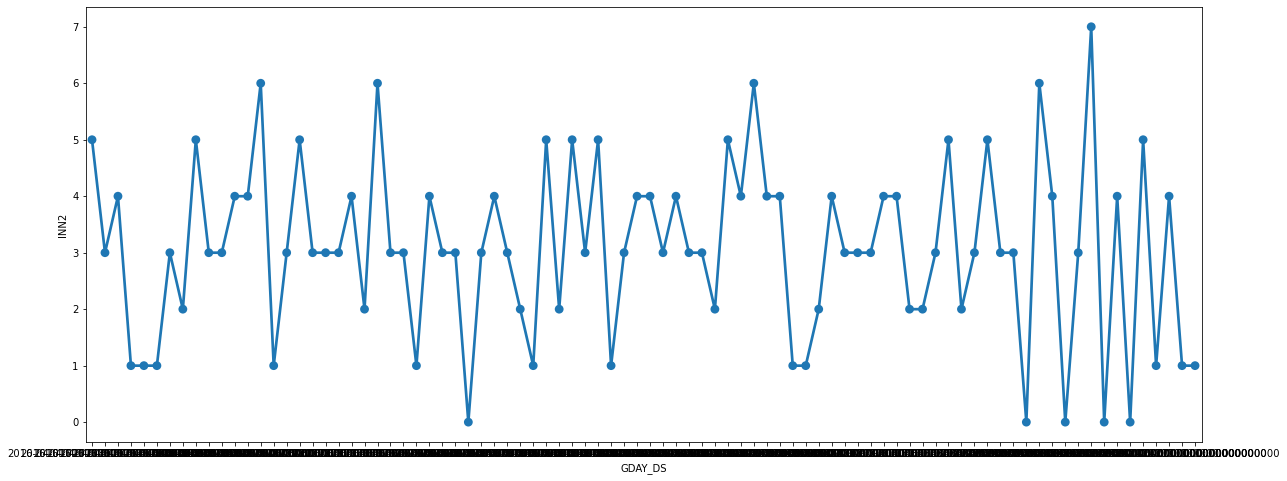

In [66]:
figure,ax = plt.subplots()
figure.set_size_inches(20,8)

sns.pointplot(x='GDAY_DS',y='INN2',data=temp)

## 1. Simple Exponential smoothing

- 7:3으로 train test data split

In [67]:
temp = temp[['GDAY_DS','INN2']]
train = temp[0:60]
test = temp[61:]

In [68]:
fit1 = SimpleExpSmoothing(np.array(train.INN2)).fit(smoothing_level=0.4)
pred = fit1.forecast(len(test))
pred = pd.DataFrame(pred)
pred.index = test['GDAY_DS']
pred= pred.rename(columns={0:'prediction1'})
result = pd.merge(test,pred,on='GDAY_DS')

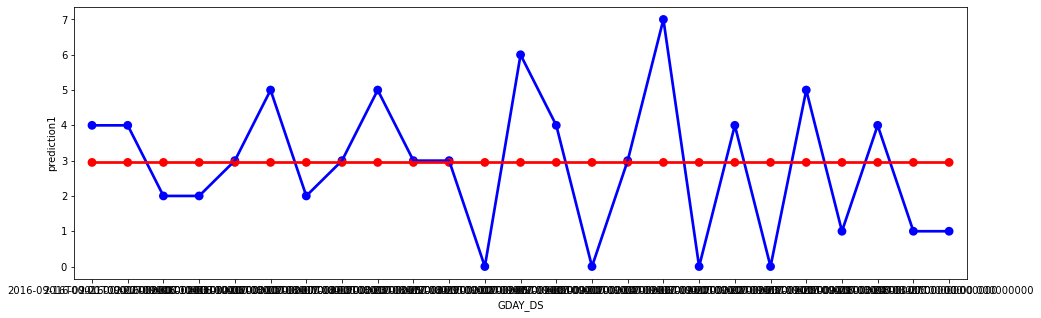

In [69]:
figure,ax = plt.subplots()
figure.set_size_inches(16,5)

sns.pointplot(x='GDAY_DS',y='INN2',data=result,ax=ax,color='blue')
sns.pointplot(x='GDAY_DS',y='prediction1',data=result,ax=ax,color='red')

## 2.  holt's Exponential Smoothing

In [70]:
fit2 = Holt(np.array(train.INN2)).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
pred = fit2.forecast(len(test))
pred = pd.DataFrame(pred)
pred.index = test['GDAY_DS']
pred= pred.rename(columns={0:'prediction2'})
result = pd.merge(result,pred,on='GDAY_DS')

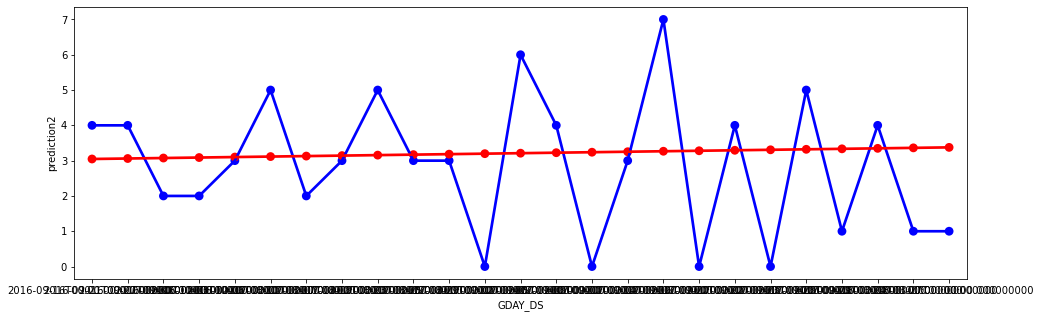

In [71]:
figure,ax = plt.subplots()
figure.set_size_inches(16,5)

sns.pointplot(x='GDAY_DS',y='INN2',data=result,ax=ax,color='blue')
sns.pointplot(x='GDAY_DS',y='prediction2',data=result,ax=ax,color='red')

## 3. holt-winter's exponential smoothing

In [72]:
fit3 = ExponentialSmoothing(np.array(train.INN2), seasonal_periods=12,  trend='add',seasonal='add').fit()
pred = fit3.forecast(len(test))
pred = pd.DataFrame(pred)
pred.index = test['GDAY_DS']
pred= pred.rename(columns={0:'prediction3'})
result = pd.merge(result,pred,on='GDAY_DS')

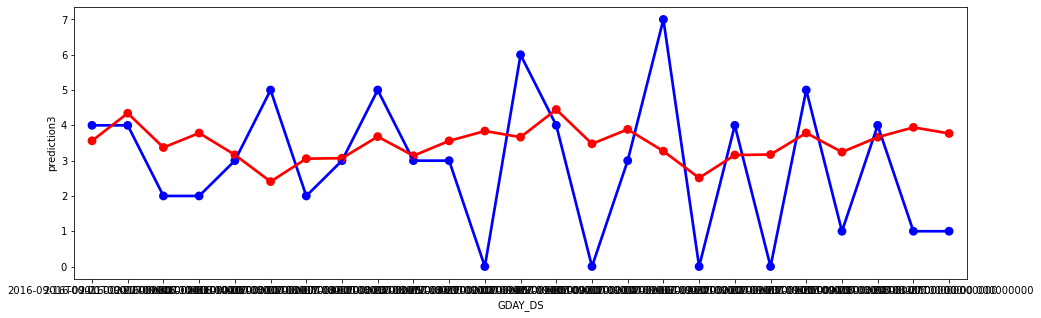

In [73]:
figure,ax = plt.subplots()
figure.set_size_inches(16,5)

sns.pointplot(x='GDAY_DS',y='INN2',data=result,ax=ax,color='blue')
sns.pointplot(x='GDAY_DS',y='prediction3',data=result,ax=ax,color='red')